In [1]:
#import libraries
import sqlite3
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#Load the four csv files
annex1 = pd.read_csv("annex1.csv")
annex2 = pd.read_csv("annex2.csv")
annex3 = pd.read_csv("annex3.csv")
annex4 = pd.read_csv("annex4.csv")

In [3]:
annex1

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables
...,...,...,...,...
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom


In [4]:
annex2

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No


In [5]:
annex3

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [6]:
annex4

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78
...,...,...,...
246,106971533455008,Haixian Mushroom (Bag) (3),1.30
247,106971563780002,Xianzongye (Bag) (2),0.00
248,106972776821582,Xianzongye (Bag) (3),9.43
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),11.13


In [7]:
annex1.columns

Index(['Item Code', 'Item Name', 'Category Code', 'Category Name'], dtype='object')

In [8]:
annex2.columns

Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)'],
      dtype='object')

In [9]:
annex3.columns

Index(['Date', 'Item Code', 'Wholesale Price (RMB/kg)'], dtype='object')

In [10]:
annex4.columns

Index(['Item Code', 'Item Name', 'Loss Rate (%)'], dtype='object')

In [11]:
#prepare sales data from annex2 (it contains item code, quantity,unit price, date)
sales_data = annex2[['Item Code','Quantity Sold (kilo)','Unit Selling Price (RMB/kg)','Date']].copy()

In [12]:
#Merge with annex3 for prices if unit price is missing
if 'Unit Selling Price (RMB/kg)' not in sales_data.columns or sales_data['Unit Selling Price (RMB/kg)'].isna().any():
    sales_data = sales_data.merge(
        annex3[['Item Code','Date','Wholesale Price (RMB/kg)']],
        on=['Item Code','Date'], how='left'
    )
    sales_data['Price'] = sales_data['Unit Selling Price (RMB/kg)'].fillna(sales_datas['Wholesale Price (RMB/kg)'])
else:
    sales_data['Price'] = sales_data['Unit Selling Price (RMB/kg)']

In [13]:
#Merge with aannex1 for item name and category name
merged_data = sales_data.merge(
    annex1[['Item Code','Item Name','Category Name']],
    on= 'Item Code', how='left'
)

In [14]:
#Handle missing values
merged_data['Item Name'] = merged_data['Item Name'].fillna('Unknown')
merged_data['Category Name'] = merged_data['Category Name'].fillna('Unknown')
merged_data['Price'] = merged_data['Price'].fillna(0) 
merged_data['Quantity Sold (kilo)'] = merged_data['Quantity Sold (kilo)'].fillna(0) 

In [15]:
#Select relevant columns
merged_data = merged_data[['Item Code', 'Item Name', 'Category Name', 'Quantity Sold (kilo)', 'Price', 'Date']]

In [16]:
#Create SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [17]:
#Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        item_code TEXT,
        item_name TEXT,
        category_name TEXT,
        quantity  REAL,
        price REAL,
        date TEXT
    )
''')

In [18]:
merged_data.rename(columns={
    'Quantity Sold (kilo)': 'quantity',
    'Price': 'price',
    'Item Code': 'item_code',
    'Item Name': 'item_name',
    'Category Name': 'category_name',
    'Date': 'date'
}, inplace=True)


In [19]:
#Insert data into SQLite
merged_data.to_sql('sales',conn,if_exists='replace',index=False)

878503

In [20]:
#SQL query to summarize by category
query = '''
    SELECT "Category Name",
           SUM(quantity) AS total_quantity,
           SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY "Category Name"
'''
df = pd.read_sql_query(query, conn)
print(df)


  "Category Name"  total_quantity       revenue
0   Category Name      470975.918  3.369766e+06


In [21]:
#Print results
print("Sales Summary by Category")
print(df)

Sales Summary by Category
  "Category Name"  total_quantity       revenue
0   Category Name      470975.918  3.369766e+06


In [22]:
print(df.columns)

Index(['"Category Name"', 'total_quantity', 'revenue'], dtype='object')


In [23]:
print([col for col in df.columns])  # shows column names explicitly

# or remove spaces from column names:
df.columns = df.columns.str.strip()

['"Category Name"', 'total_quantity', 'revenue']


<Axes: xlabel='category_name'>

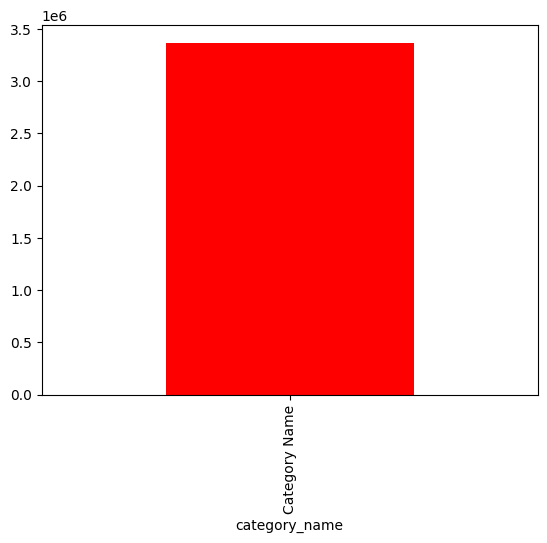

In [24]:
# Rename column to clean name
df.rename(columns={'"Category Name"': 'category_name'}, inplace=True)

# Define colors list or single color
colors = ['red', 'blue', 'green', 'orange', 'purple']  # make sure length matches number of categories

# Plot
df.plot(kind='bar', x='category_name', y='revenue', color=colors, legend=False)


In [25]:
# Remove all double quotes from column names
df.columns = df.columns.str.replace('"', '')

print(df.columns.tolist())  # Verify the new columns

['category_name', 'total_quantity', 'revenue']


In [27]:
print(df.columns.tolist())

['category_name', 'total_quantity', 'revenue']


In [28]:
for col in df.columns:
    print(f"'{col}' (length={len(col)})")

'category_name' (length=13)
'total_quantity' (length=14)
'revenue' (length=7)


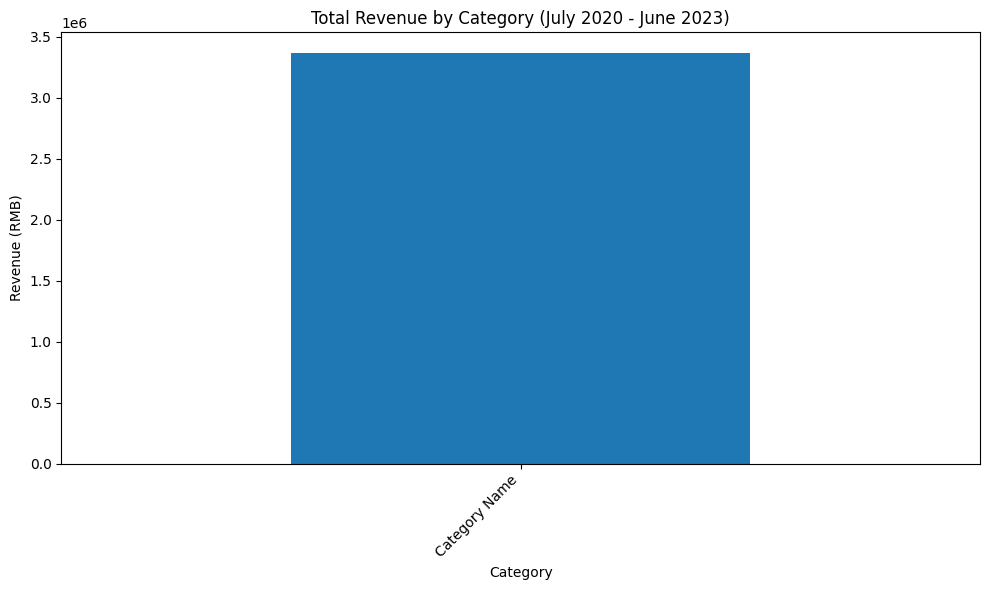

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors[:len(df)]
df.plot(kind='bar', x='category_name', y='revenue', color=colors, legend=False, ax=plt.gca())
plt.title('Total Revenue by Category (July 2020 - June 2023)')
plt.xlabel('Category')
plt.ylabel('Revenue (RMB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
#save chart
plt.savefig("sales_chart.png")
plt.close()

In [31]:
#close database connection
conn.close()

In [32]:
#save summary to csv
df.to_csv("sales_summary.csv", index=False)

In [33]:
print("\nOutput files generated:")
print("- sales_data.db: SQLite database with sales table")
print("- sales_chart.png: Bar chart of revenue by category")
print("- sales_summary.csv: Summary table of total quantity and revenue by category")


Output files generated:
- sales_data.db: SQLite database with sales table
- sales_chart.png: Bar chart of revenue by category
- sales_summary.csv: Summary table of total quantity and revenue by category
